# Project Name : Email spam classification
 ###   dataset : SPAM text message 20170820 - Data.csv

# Definition of the Project
 > The aim of this project is to build a predictive model that learns from a corpus of pre-labelled emails (some labelled as spam, others as not spam), and uses this learned information to classify new, unseen emails into either of these categories. This can help in automatically sorting or filtering out unwanted emails or potentially malicious messages in a large inbox.

# About the Dataset
> it was collected on August 20, 2017

# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Reading the dataset

In [2]:
df = pd.read_csv('SPAM text message 20170820 - Data.csv')

In [3]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Exploring the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
# Checking missing values of the dataset
df.isnull().sum()

Category    0
Message     0
dtype: int64

# Checking and Dropping the Duplicate Messages from the dataset

In [6]:
# Checking duplicate values of the dataset
df.duplicated().sum()

415

In [7]:
# removing the duplicated values 
df=df.drop_duplicates()

In [8]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
# Checking duplicate values of the dataset
df.duplicated().sum()

0

# Visualizing the dataset inform of graphs

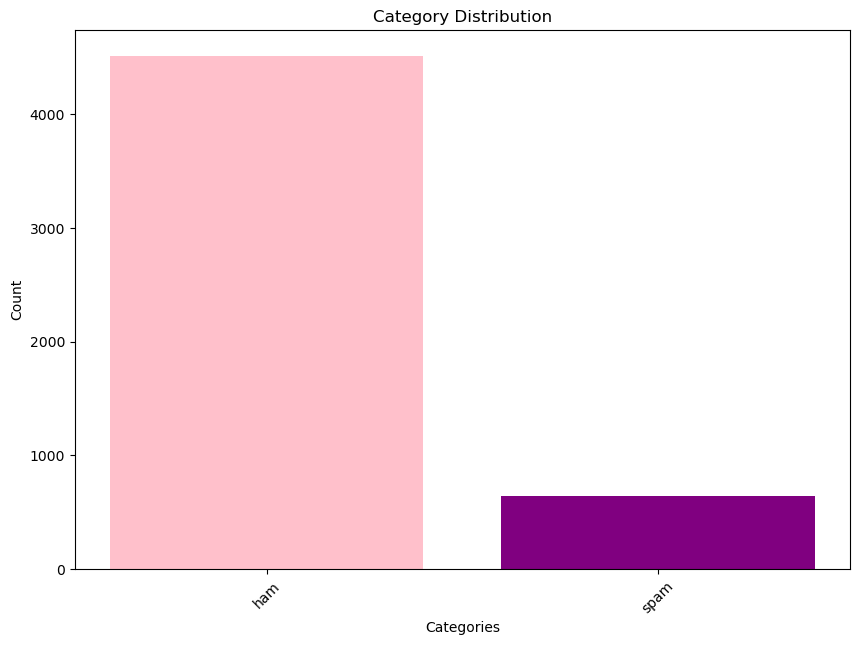

In [69]:
# Create a bar chart
plt.figure(figsize=(10, 7))
plt.bar(category_counts.index, category_counts.values, color=['pink', 'purple'])
plt.title('Category Distribution')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

([<matplotlib.patches.Wedge at 0x1d0115c9310>,
 [Text(-1.017194586770333, 0.41870654717251754, 'ham'),
  Text(1.0171945769697988, -0.41870657098167496, 'spam')],
 [Text(-0.5548334109656361, 0.22838538936682773, '87.6%'),
  Text(0.5548334056198901, -0.22838540235364085, '12.4%')])

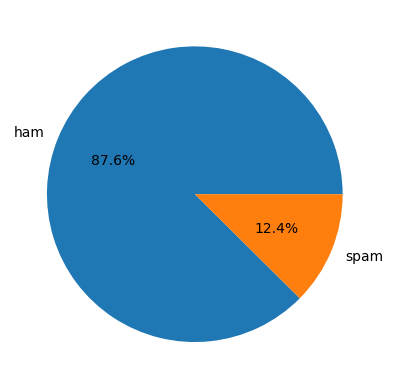

In [71]:
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')

> calculating the message from pie chart infrom of percentage , 87.6% are ham messages and 12.4% are spam messages 

In [12]:
# Assuming you have two columns named 'category' and 'value' in your dataset
pivot_table = df.pivot_table(index='Category', columns='Category', aggfunc=len, fill_value=0)

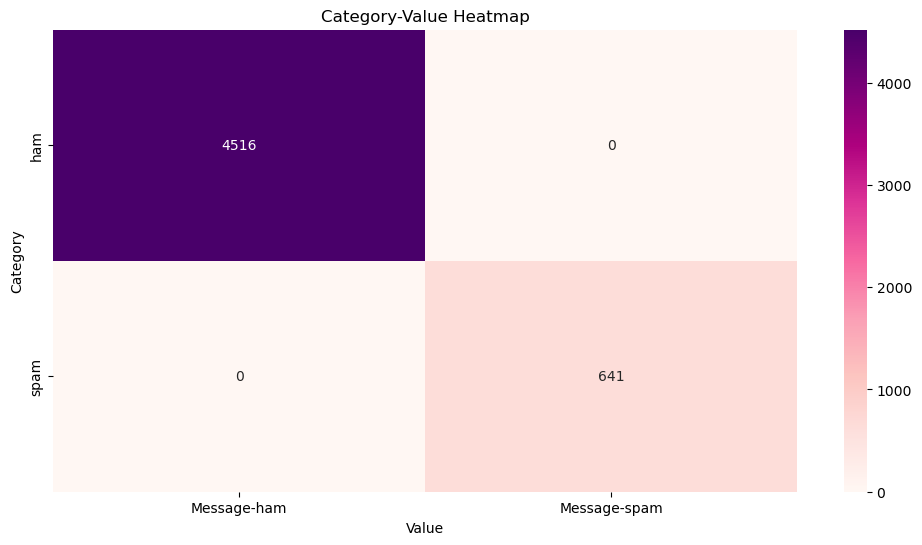

In [48]:
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='RdPu', annot=True, fmt='d')
plt.title('Category-Value Heatmap')
plt.xlabel('Value')
plt.ylabel('Category')
plt.show()

> the above heatmap represent the comparison between the spam and ham texts with messsage-ham and message-spam, the email must have 4516 ham messages and 641 spam messages 

# Spliting the features and target column in X and Y

In [14]:
# split data into features and target
X = df['Message']
y = df['Category']

# Applying the label encoder

In [15]:
# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

# Spliting the dataset into train and test sets 

In [16]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying the stop_words and bag of words library from nltk

In [17]:
# Text preprocessing
stop_words = set(stopwords.words('english'))

In [18]:
def preprocess_text(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.casefold() not in stop_words]
    return " ".join(filtered_text)

> the above methods is to create a new list that contains only the words from word_tokens that are not in stop_words. The casefold() method is used to make the filtering case-insensitive. casefold() is similar to lower() but more aggressive because it is designed to remove all case distinctions in a string.

In [28]:
preprocess_text

<function __main__.preprocess_text(text)>

In [19]:
X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

In [20]:
# Create Bag of Words
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# Applying Logistic Regression and pipeline 

In [32]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_cv, y_train)
predictions = lr.predict(X_test_cv)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, predictions))

Logistic Regression Accuracy:  0.9835271317829457


In [33]:
# Define a pipeline combining a text feature extractor with classifiers
pipeline_log_reg = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', LogisticRegression()),
])

In [34]:
# Train and test the Logistic Regression pipeline
pipeline_log_reg.fit(X_train, y_train)
predictions = pipeline_log_reg.predict(X_test)
cm_lr = confusion_matrix(y_test, predictions)
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_score(y_test, predictions) * 100))

Logistic Regression Accuracy: 98.35%


# Applying Perceptron ,pipeline and TF-IDF

In [39]:
# Perceptron
perc = Perceptron()
perc.fit(X_train_cv, y_train)
predict = perc.predict(X_test_cv)
print("Perceptron Accuracy: ", accuracy_score(y_test, predict))

Perceptron Accuracy:  0.9670542635658915


In [40]:
pipeline_perc = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', Perceptron()),
])

In [42]:
# Train and test the Perceptron pipeline
pipeline_perc.fit(X_train, y_train)
predictions = pipeline_perc.predict(X_test)
cm_perc = confusion_matrix(y_test, predict)
print("Perceptron Accuracy: {:.2f}%".format(accuracy_score(y_test, predict) * 100))

Perceptron Accuracy: 96.71%


# creating the heatmap for actual and predicted values 

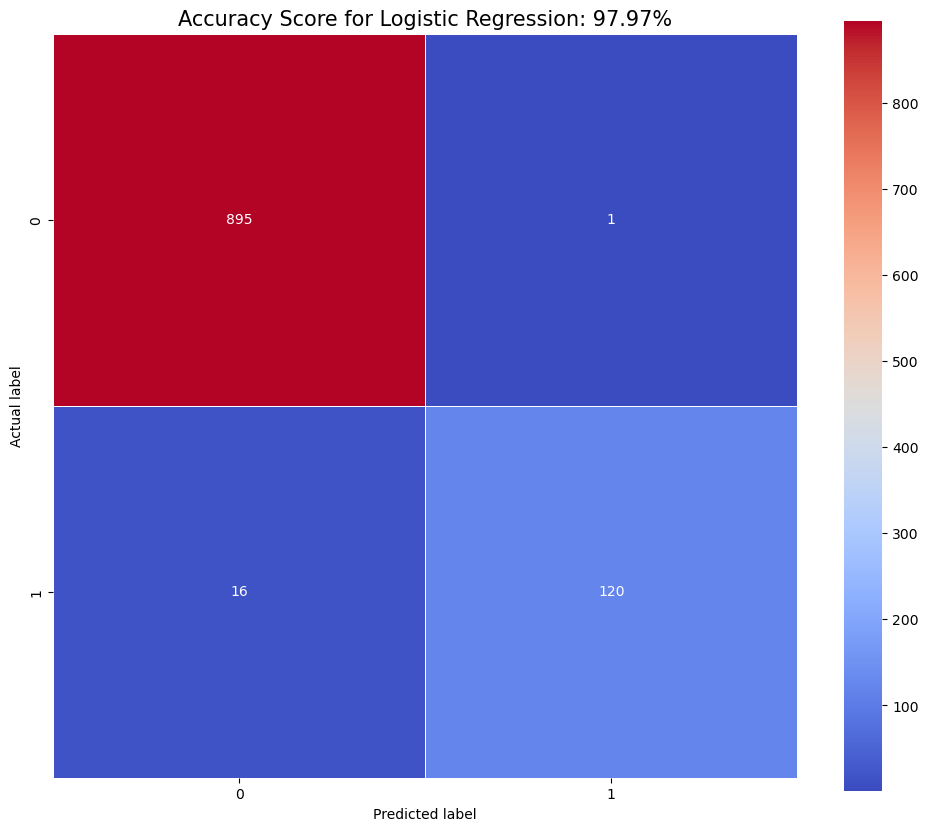

In [56]:
plt.figure(figsize=(12,10))
sns.heatmap(cm_lr, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'coolwarm');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score for Logistic Regression: {:.2f}%'.format(accuracy_score(y_test, predictions) * 100), size = 15);
plt.show()

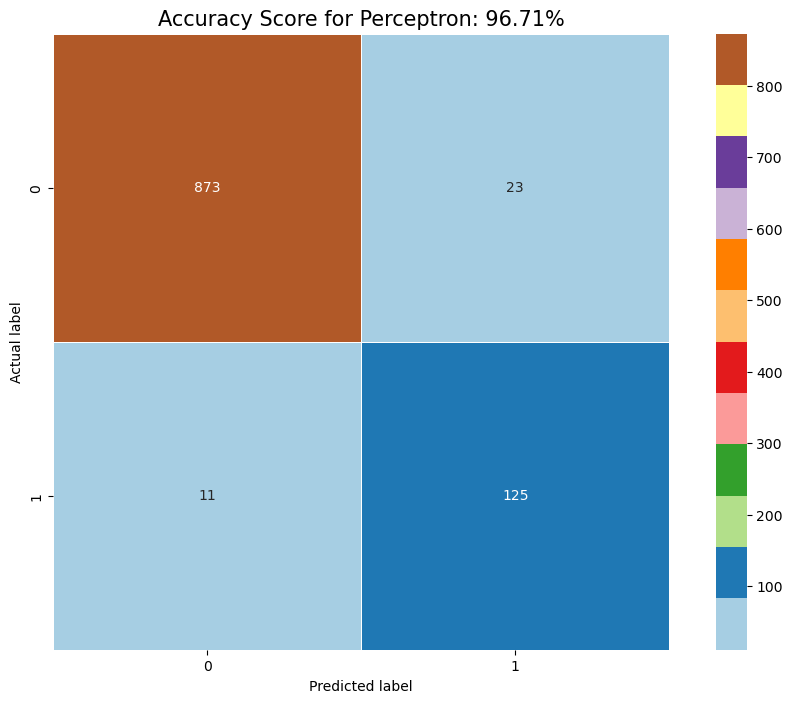

In [54]:
plt.figure(figsize=(12,8))
sns.heatmap(cm_perc, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Paired');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score for Perceptron: {:.2f}%'.format(accuracy_score(y_test, predict) * 100), size = 15);
plt.show()

> In these heatmaps, the x-axis represents the predicted labels and the y-axis represents the actual labels. The numbers in the squares represent the counts of each type of prediction (true positive, false positive, true negative, and false negative) for the both heatmap which presented to you